<h1><center>PHYS 5306: Classical Dynamics
    </center></h1>

<h2><center>Joseph D. Romano<br>
    Texas Tech University<br>
    (Fall 2020)
    </center></h2>

<center><a href = "mailto: joseph.d.romano@ttu.edu">joseph.d.romano@ttu.edu</a></center>

![](img/centaurus_composite.jpeg)

## Load relevant packages

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle, json
import astropy.constants as c
import astropy.units as u
from mpmath import *
from sympy import *
import sympy
from sympy.solvers import solve
from sympy.plotting import plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Lagrangian mechanics

1) Write down the Lagrangian for a simple system in terms of generalized coordinates.

Generic form:

$$
L(q,\dot q, t) = T - U(q,t)
$$

where $T$ is the kinetic energy and $U$ is the potential energy.
More explicitly,

$$
L= \frac{1}{2}\sum_{j,k}a_{jk}(q) \dot q_j\dot q_k - U(q_1,q_2,\cdots, q_n, t)
$$

2) Distinguish generalized coordinates from Cartesian coordinates.

Example: Double pendulum

<img src="img/double_pendulum.pdf" width="400">

Use the two angles $\phi_1$, $\phi_2$ as opposed to the Cartesian coordinates $(x_1,y_1)$ and $(x_2,y_2)$ for the two pendulum bobs

3) Write down Lagrange's equations.

- Derive Lagrange's equations starting from the action $S$.

- Define the action in terms of the Lagrangian, and the conditions for the variation of the action.

- Show that Lagrange's equations are unchanged if one adds a total time derivative $\d f(q,t)/\d t$ to $L$.

- Include constraint forces in the Lagrangian formalism by introducing Lagrange multipliers and constraint functions.

- Include non-conservative forces in the Lagrangian formalism by adding the generalized force 
$$ F_i\equiv\sum_a \vec{F}_a\cdot \partial \vec r_a/\partial q_i $$ 
to the RHS of Lagrange's equations.

- Define and give examples of a *closed system*, *constant external field*, and *uniform field*.


In [3]:
# symbolic calculation (for future reference)
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

t0 = 1.4809609793861218
period = 8.885765876316732


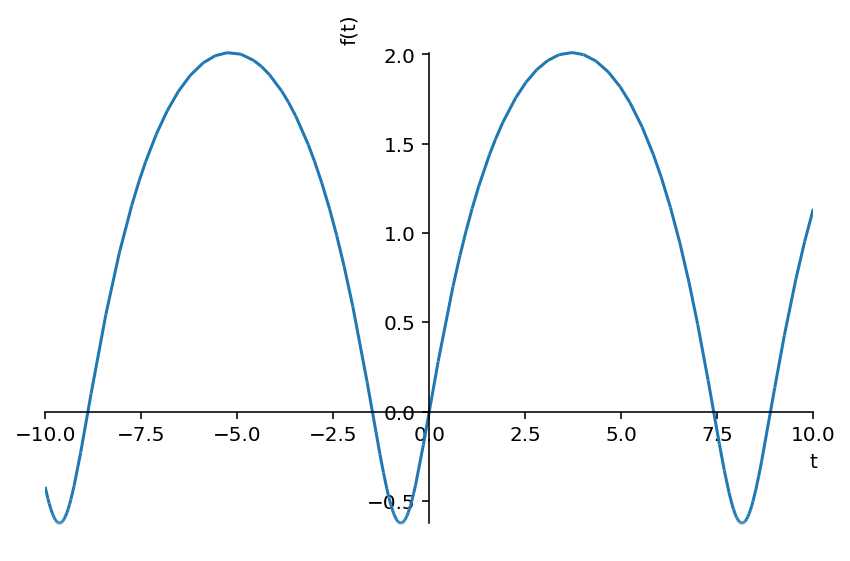

t0 = -0.7071067811865475
x0 = -0.6931471805599453


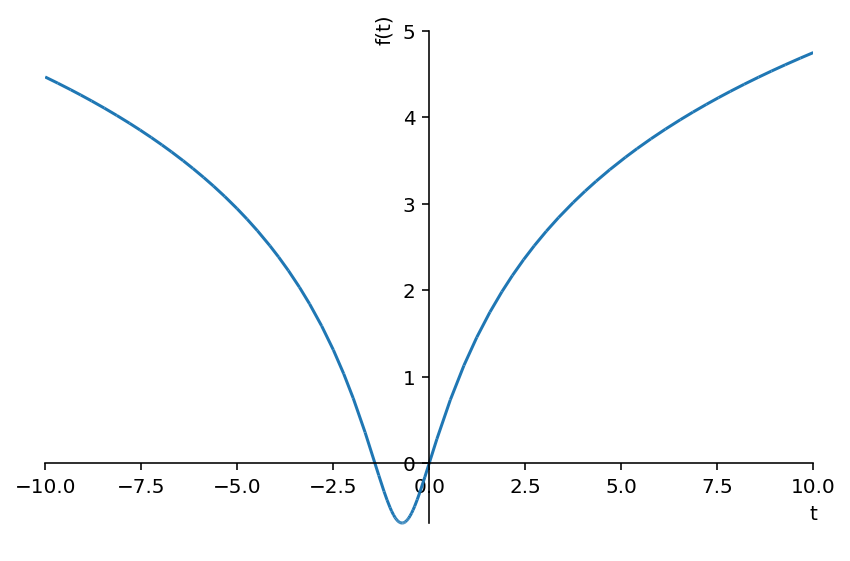

t0 = 0.5731079173902944


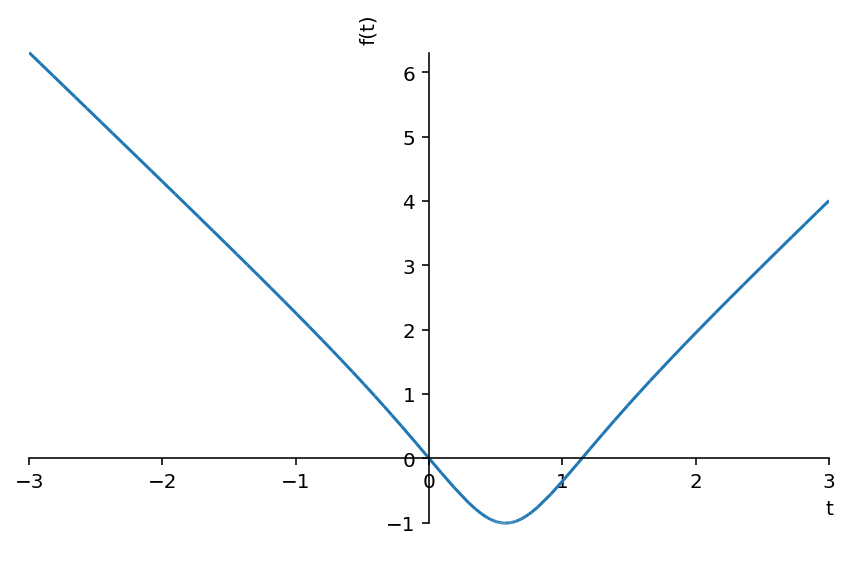

In [4]:
# problem 1a
x, t = symbols('x, t') 

# bound solution
E = -0.25
t0 = (1/np.sqrt(2*abs(E))) * np.arcsin(np.sqrt(1-abs(E)))
T = 2*np.pi/np.sqrt(2*abs(E))
print('t0 =', t0)
print('period =', T)

x = log( (1/abs(E)) * (1 + np.sqrt(1-abs(E)) * sin(np.sqrt(2*abs(E)) * (t-t0)) )  )
plot(x)

# critical solution
E = 0
t0 = -1/np.sqrt(2)
print('t0 =', t0)
x0 = -np.log(2)
print('x0 =', x0)
x = log( 1/2 + (t-t0)**2 )
plot(x)

# scattering solution
E = 2
t0 = (1/np.sqrt(2*E)) * np.arccosh(np.sqrt(1+E))
print('t0 =', t0)

x = log( (1/E) * (-1 + np.sqrt(1+E) * cosh(np.sqrt(2*E) * (t-t0)) )  )
plot(x, (t, -3, 3))

period = 8.885765876316732


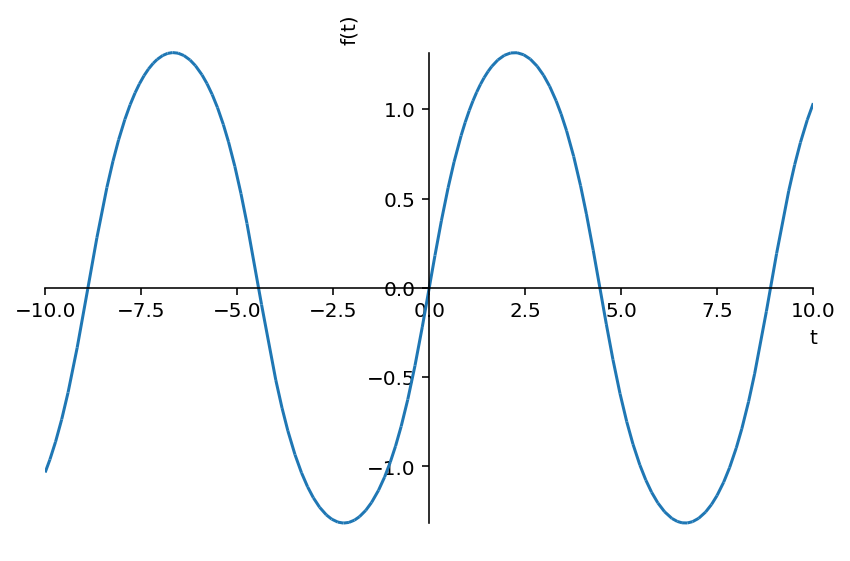

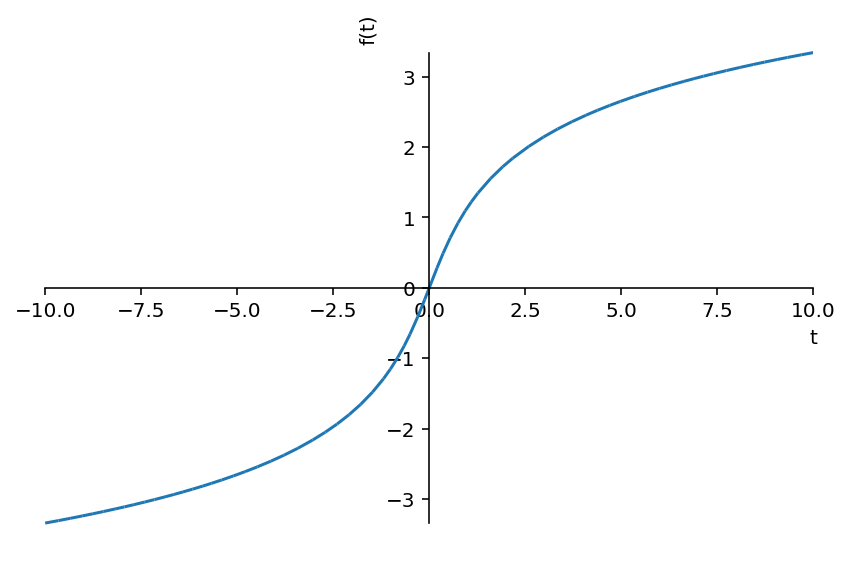

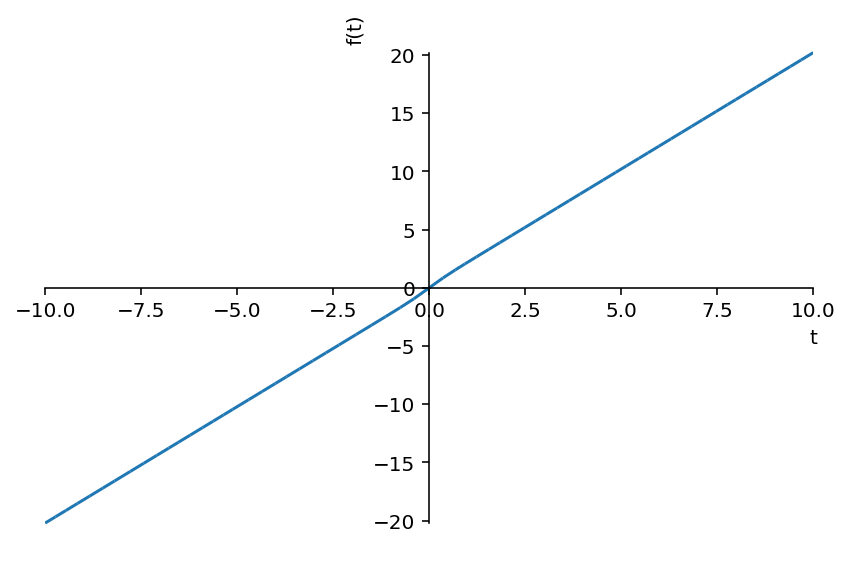

In [5]:
# problem 1.1(b)
x, t = symbols('x, t') 

# bound solution
E = -0.25
T = 2*np.pi/np.sqrt(2*abs(E))
print('period =', T)

x = asinh( np.sqrt(-1 + 1/abs(E)) * sin( np.sqrt(2*abs(E)) * t) )
plot(x)

# critical solution
E = 0
x = asinh( np.sqrt(2) * t )
plot(x)

# scattering solution
E = 2

x = asinh( np.sqrt(1 + 1/E) * sinh(np.sqrt(2*E) * t) )
plot(x)

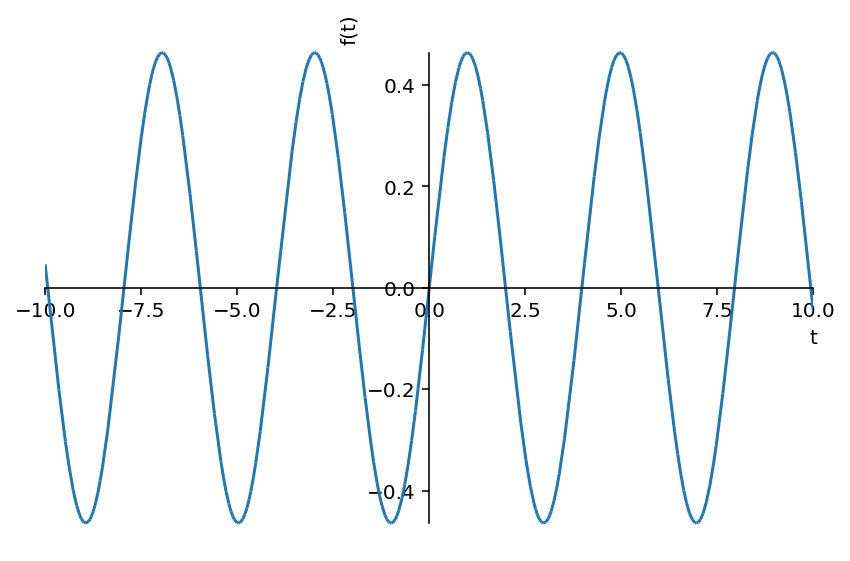

In [6]:
# problem 1.1(c)

# only bound solutions with E>0
x, t = symbols('x, t')
E = 0.25
U0 = 1

x = asin( np.sqrt(E/(E+U0)) * sin (np.sqrt(2*(E+U0)) * t) )
plot(x)